# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 目的是分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系

并没有不重要的数据,所有的数据都与目的有关.

# 读取数据

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv('./Penguins.csv')
original_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# 评估和清理数据

In [3]:
# 创建修改后的数据
cleaned_data = original_data.copy()

In [4]:
# 先拉几个看看结构
cleaned_data.sample(10)
# 每列为一个变量,每行为一个观察值,每个单元格为一个值.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,FEMALE
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
139,Adelie,Dream,39.7,17.9,193.0,4250.0,MALE
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,MALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
248,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,FEMALE
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE
141,Adelie,Dream,40.6,17.2,187.0,3475.0,MALE
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE


In [5]:
# 观察内容
cleaned_data.info()
# 发现序列为2,3,4,5,6列都有缺失值,数据的类型没有错误,为浮点数和字符串,但sex, species, island是分类数据,类型很有限,改为category.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
cleaned_data['sex'] = cleaned_data['sex'].astype('category')
cleaned_data['species'] = cleaned_data['species'].astype('category')
cleaned_data['island'] = cleaned_data['island'].astype('category')

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


In [8]:
# 先看看空缺的部分的情况
cleaned_data[cleaned_data['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned_data.query('culmen_depth_mm.isnull()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data.query('body_mass_g.isnull()')
# 发现都是同样的结果,四个值都不见了.应该删掉这两个观察值.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
# 开始处理缺失,因为缺失的2,3,4,5都是最后的结果,所以缺失部分要删除
cleaned_data = cleaned_data.dropna(subset = ['culmen_length_mm'])
cleaned_data = cleaned_data.dropna(subset = ['culmen_depth_mm'])
cleaned_data = cleaned_data.dropna(subset = ['flipper_length_mm'])
cleaned_data = cleaned_data.dropna(subset = ['body_mass_g'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [13]:
# 现在看看sex的情况
cleaned_data.query('sex.isnull()')
# 其他值还在，可以保留，在计算的时候会自动忽略缺失值。

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [14]:
# 处理重复数据
# 允许重复

In [15]:
# 处理不一致数据，可能存在于所有分类变量中，两个不同的描述表示同一个意思
cleaned_data['sex'].value_counts()
# . 应该改为空缺

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [16]:
cleaned_data['sex'] = cleaned_data['sex'].replace('.', np.nan)

C:\Users\fu'yun'hong\AppData\Local\Temp\ipykernel_21136\45240489.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace('.', np.nan)


In [17]:
cleaned_data['species'].value_counts()
# 无问题

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [18]:
cleaned_data['island'].value_counts()
# 无问题

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [19]:
# 无效或错误数据
cleaned_data.describe()
# 没有出现无实际意义的数据
# 评估和清洗数据完成

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 探索数据

数据可视化

In [20]:
# 设置色盘
sns.set_palette('pastel')

In [21]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅各个种类的比例

In [22]:
# 先看各个种类的企鹅分别有多少数目,再将得到的Series转化为饼图
species_count = cleaned_data['species'].value_counts()
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

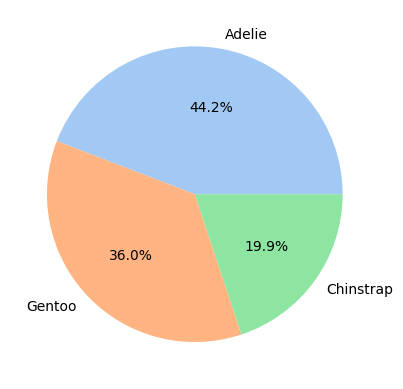

In [23]:
# 转化为饼图,同时加索引.
plt.pie(species_count, autopct = '%.1f%%', labels = species_count.index)
plt.show()

### 企鹅所属岛屿比例

In [26]:
island_count = cleaned_data['island'].value_counts()
island_count

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

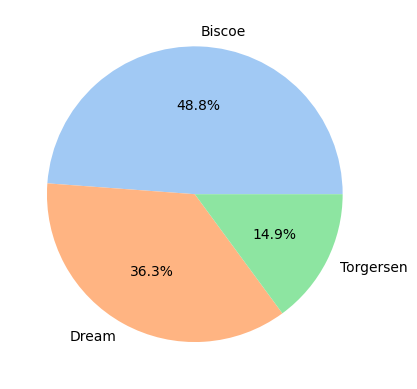

In [28]:
plt.pie(island_count, autopct = '%.1f%%', labels = island_count.index)
plt.show()

## 企鹅性别比例

In [29]:
sex_count = cleaned_data['sex'].value_counts()
sex_count

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

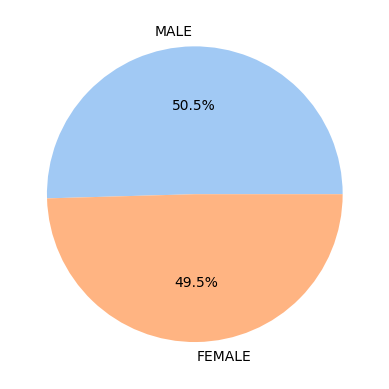

In [31]:
plt.pie(sex_count, autopct = '%.1f%%', labels = sex_count.index)
plt.show()

In [32]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 不同岛屿上的企鹅种类数量

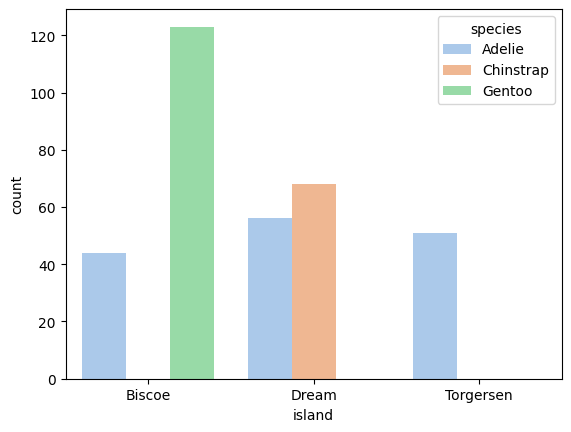

In [37]:
# hue = 'species' 是指在以横坐标为岛屿分类的基础下再进行分类,以种族来分.
sns.countplot(cleaned_data, x = 'island', hue = 'species')
plt.show()

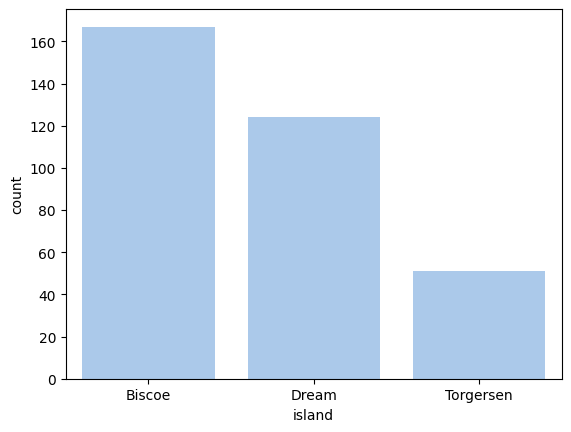

In [38]:
sns.countplot(cleaned_data, x = 'island')
plt.show()

## 不同岛屿上企鹅性别的分布

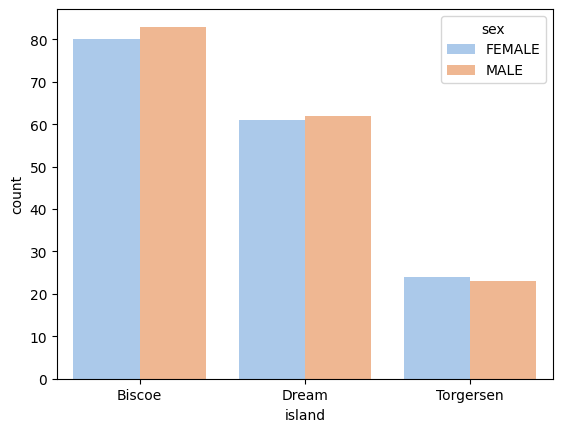

In [41]:
# 在这里,以island为标准将数量进行分类,hue增加了性别作为分类变量,会自动为性别不同的类变量添加不同颜色进行区分
sns.countplot(cleaned_data, x = 'island', hue = 'sex')
plt.show()

## 根据种类查看数值与数值变量之间的关系

In [44]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


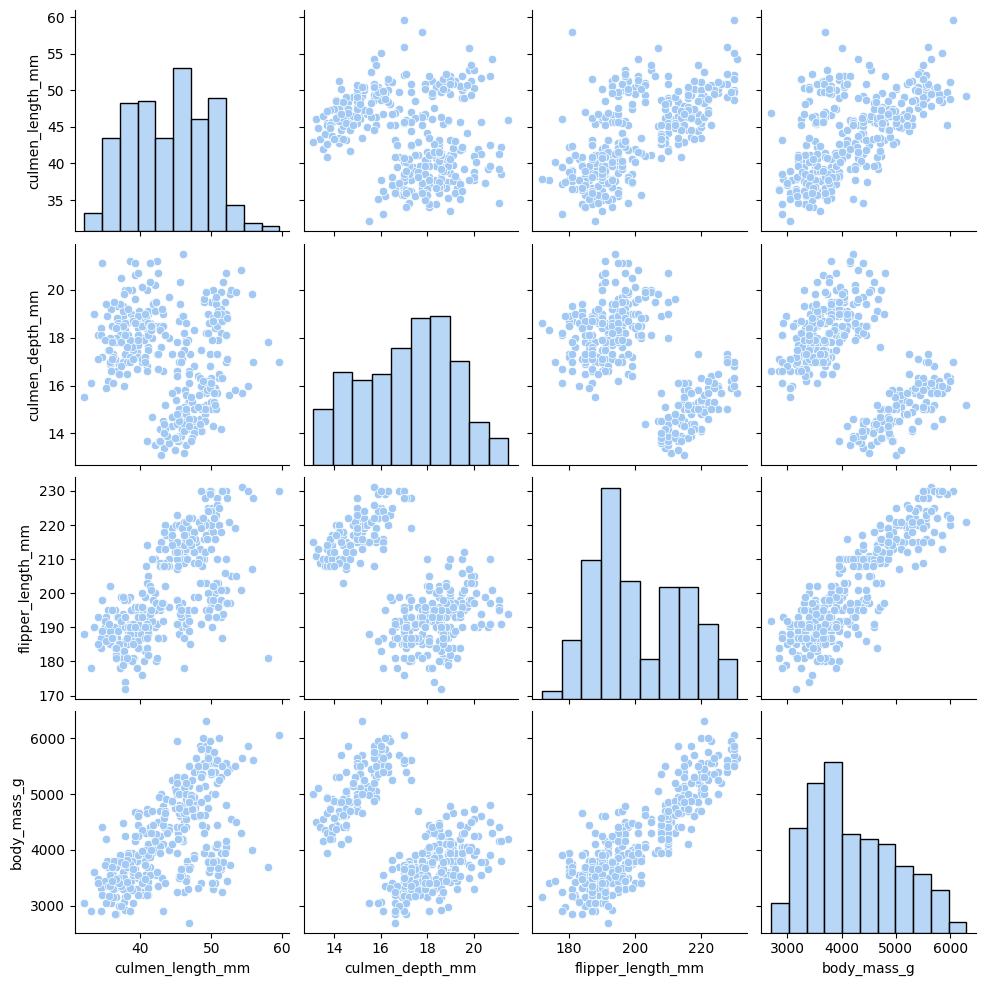

In [43]:
sns.pairplot(cleaned_data)
plt.show()

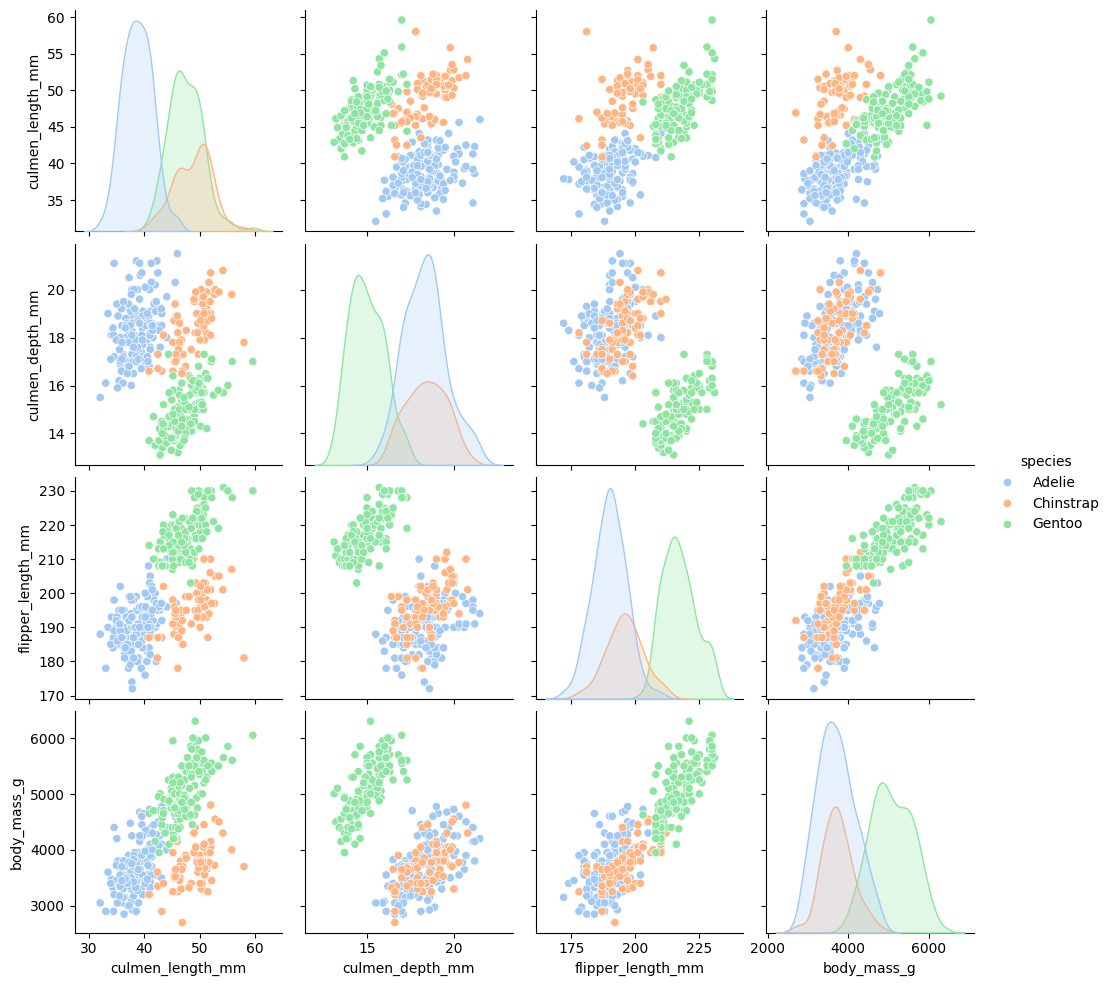

In [45]:
sns.pairplot(cleaned_data, hue = 'species')
plt.show()

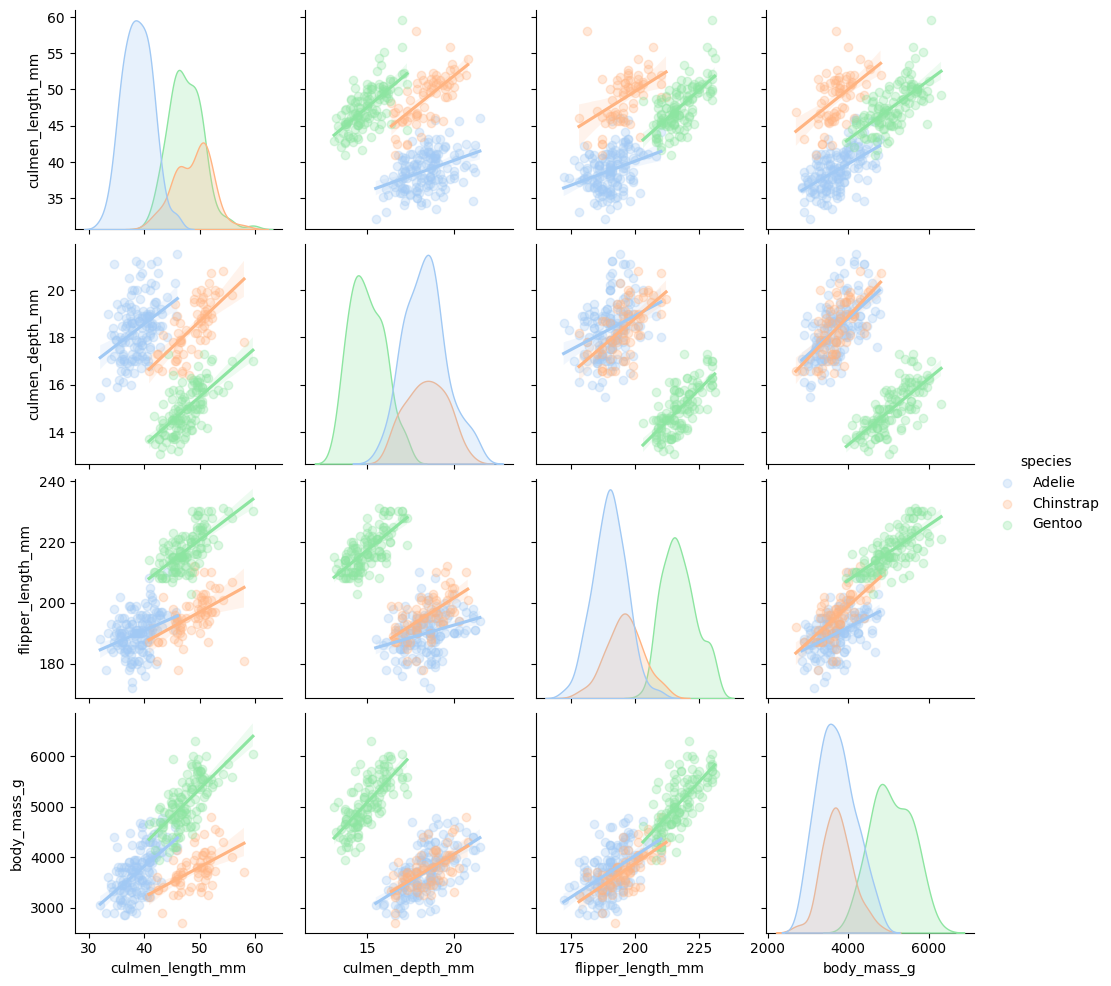

In [48]:
# kind设置一个分布线趋势,再设置散点图的透明度
sns.pairplot(cleaned_data, hue = 'species', kind = 'reg', plot_kws = {'scatter_kws': {"alpha": 0.3}})
plt.show()

## 根据性别查看数值与数值之间的相关关系

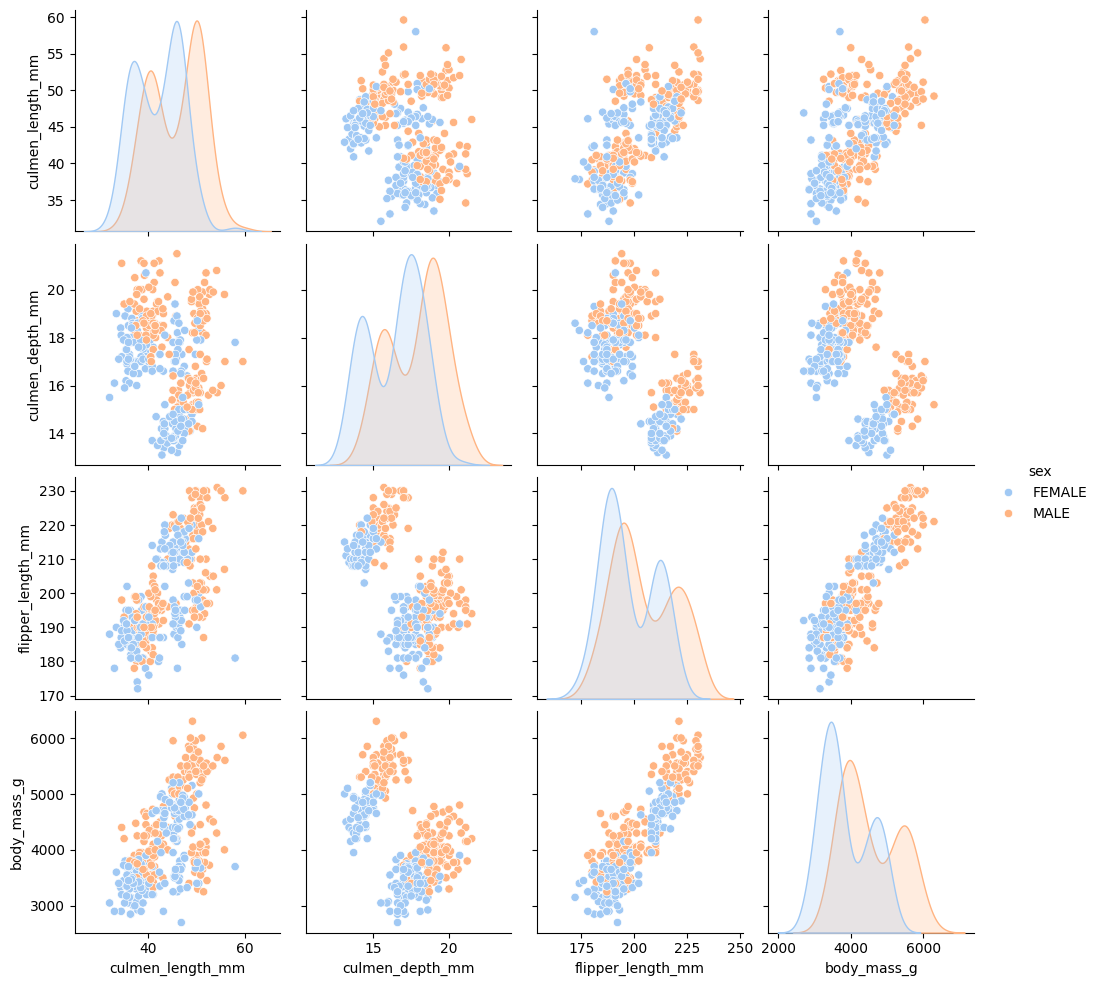

In [49]:
sns.pairplot(cleaned_data, hue = 'sex')
# hue = 'sex' 指的是在已有的 sns.pairplot(cleaned_data) 的图形基础上再以性别作为标准对已有的图形进行分类.
plt.show()